In [ ]:
# filename = '/content/drive/MyDrive/Datasets/'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = '/content/drive/MyDrive/Datasets/'
CATEGORIES = ["acanthosis-nigricans", "acne", "acne-scars", "alopecia-areata", "dry", "melasma", "oily", "vitiligo", "warts"]

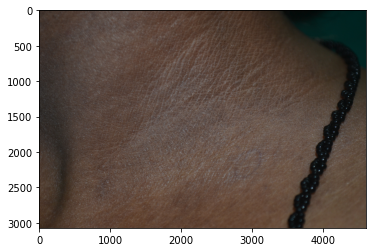

In [16]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        # img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        # plt.imshow(img_array, cmap='gray')  # graph it
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
    break  #...and one more!

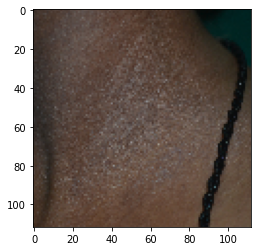

In [17]:
IMG_SIZE = 112

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
# plt.imshow(new_array, cmap='gray')
plt.imshow(new_array)
plt.show()

In [33]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                # img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

100%|██████████| 34/34 [00:09<00:00,  3.41it/s]


In [34]:
print(len(training_data))

908


In [35]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

4
2
6
4
4
3
0
4
4
3


In [46]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

# X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# y = np.array(y)

X = np.array(X)
y = np.array(y)

In [ ]:
# import pickle

# pickle_out = open("X.pickle","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [ ]:
# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle","rb")
# y = pickle.load(pickle_in)

In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [52]:
X = X/255.0

'''
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(9, 9)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(9, 9)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(9))
model.add(Activation('softmax'))
'''

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(81, activation='softmax'),
    tf.keras.layers.Dense(9)
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, epochs=5)

Epoch 1/5


ValueError: ignored

In [53]:
X = X/255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(81, activation='softmax'),
    tf.keras.layers.Dense(9)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X, y, epochs=40)

Epoch 1/40
29/29 [==============================] - 1s 33ms/step - loss: 2.1813 - accuracy: 0.2357
Epoch 2/40
29/29 [==============================] - 1s 32ms/step - loss: 2.1430 - accuracy: 0.4097
Epoch 3/40
29/29 [==============================] - 1s 33ms/step - loss: 2.1027 - accuracy: 0.4097
Epoch 4/40
29/29 [==============================] - 1s 31ms/step - loss: 2.0610 - accuracy: 0.4097
Epoch 5/40
29/29 [==============================] - 1s 31ms/step - loss: 2.0194 - accuracy: 0.4097
Epoch 6/40
29/29 [==============================] - 1s 32ms/step - loss: 1.9784 - accuracy: 0.4097
Epoch 7/40
29/29 [==============================] - 1s 32ms/step - loss: 1.9383 - accuracy: 0.4097
Epoch 8/40
29/29 [==============================] - 1s 31ms/step - loss: 1.9047 - accuracy: 0.4097
Epoch 9/40
29/29 [==============================] - 1s 31ms/step - loss: 1.8802 - accuracy: 0.4097
Epoch 10/40
29/29 [==============================] - 1s 32ms/step - loss: 1.8642 - accuracy: 0.4097
Epoch 11/

In [11]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [13]:
predictions = probability_model.predict()

ValueError: ignored